In [37]:
import pandas as pd

In [55]:
df=pd.read_csv('https://raw.githubusercontent.com/2deezer2/-Auto-pricing-mashinki-/main/Data.csv')
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1)
df

,Custom,Number_of_owners,Year,Price,Region,Mileage,Brand,Сегмент,Power,Type,Engine_type,Положение руля,Привод,Transmission,Ежегодный пробег,Средний срок владения
0,1,4,2000,310000.0,Москва,132000.0,LADA (ВАЗ),ECONOMY,79.0,Внедорожник 3 дв.,GASOLINE,LEFT,ALL_WHEEL_DRIVE,MECHANICAL,5739.130435,5.750000
1,1,1,2022,3500000.0,Москва,4000.0,Skoda,MEDIUM,190.0,Лифтбек,GASOLINE,LEFT,FORWARD_CONTROL,ROBOT,4000.000000,1.000000
2,1,1,2019,8000000.0,Москва,14000.0,Mercedes-Benz,PREMIUM,469.0,Седан Long,GASOLINE,LEFT,ALL_WHEEL_DRIVE,AUTOMATIC,3500.000000,4.000000
3,1,2,2011,310000.0,Москва,25000.0,LADA (ВАЗ),ECONOMY,80.0,Седан,GASOLINE,LEFT,REAR_DRIVE,MECHANICAL,2083.333333,6.000000
4,1,3,2018,2020000.0,Москва,61000.0,Audi,PREMIUM,150.0,Седан,GASOLINE,LEFT,FORWARD_CONTROL,ROBOT,12200.000000,1.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66928,1,3,2013,2490000.0,Химки,120000.0,Land Rover,PREMIUM,245.0,Внедорожник 5 дв.,DIESEL,LEFT,ALL_WHEEL_DRIVE,AUTOMATIC,12000.000000,3.333333
66929,1,1,2019,9700000.0,Москва,61000.0,Land Rover,PREMIUM,380.0,Внедорожник 5 дв.,GASOLINE,LEFT,ALL_WHEEL_DRIVE,AUTOMATIC,15250.000000,4.000000
66930,1,1,2018,5250000.0,Москва,159000.0,BMW,PREMIUM,265.0,Внедорожник 5 дв.,DIESEL,LEFT,ALL_WHEEL_DRIVE,AUTOMATIC,31800.000000,5.000000
66931,1,3,2013,2880000.0,Москва,96000.0,BMW,PREMIUM,184.0,Купе,DIESEL,LEFT,ALL_WHEEL_DRIVE,MECHANICAL,9600.000000,3.333333


In [59]:
df['Ежегодный пробег'] = df['Mileage']/(2023 - df['Year'])
df['Средний срок владения'] = (2023 - df['Year'])/df['Number_of_owners']
df['Ежегодный пробег'] = df['Ежегодный пробег'].fillna(df['Mileage'])
df['Средний срок владения'] = df['Средний срок владения'].fillna(0)
df.to_csv('Data.csv')
df.isna().sum()

Custom                   0
Number_of_owners         0
Year                     0
Price                    0
Region                   0
Mileage                  0
Brand                    0
Сегмент                  0
Power                    0
Type                     0
Engine_type              0
Положение руля           0
Привод                   0
Transmission             0
Ежегодный пробег         0
Средний срок владения    0
dtype: int64

<AxesSubplot:title={'center':'Какую марку продают и как часто (штуки)'}>

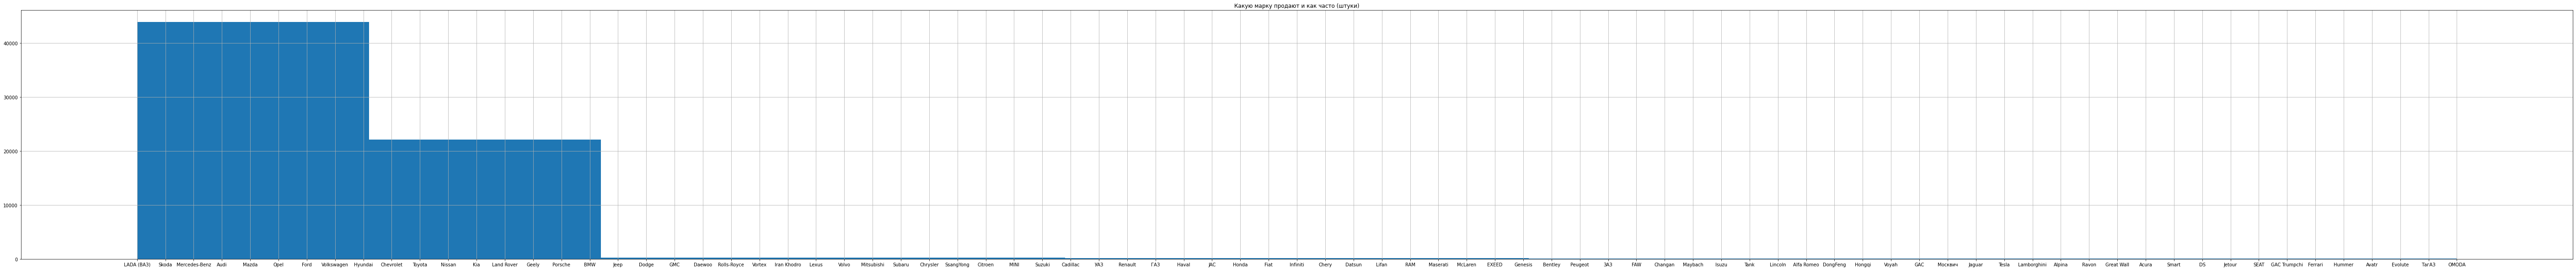

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.title('Какую марку продают и как часто (штуки)')
df.Brand.hist(figsize=(100, 10))

Мы видим, что чаще всего продают такие марки, как: LADA, Skoda, Mercedes-Benz, Audi, Mazda, Opel, Ford, Volkswagen, Hyundai.

<AxesSubplot:title={'center':'Какой год выпуска автомобиля продают и как часто (штуки)'}>

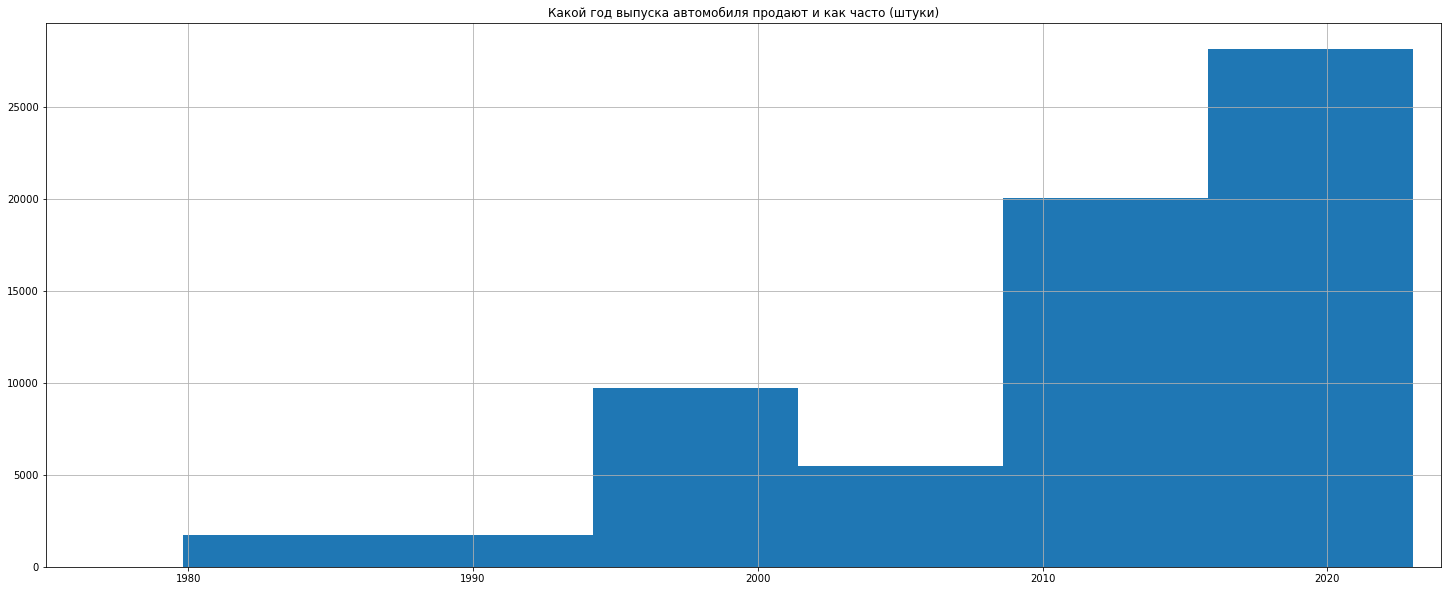

In [10]:
plt.title('Какой год выпуска автомобиля продают и как часто (штуки)')
plt.xlim(1975, 2024)
df.Year.hist(figsize=(25, 10))

Больше всего продают машины 2016-2023 года выпуска.

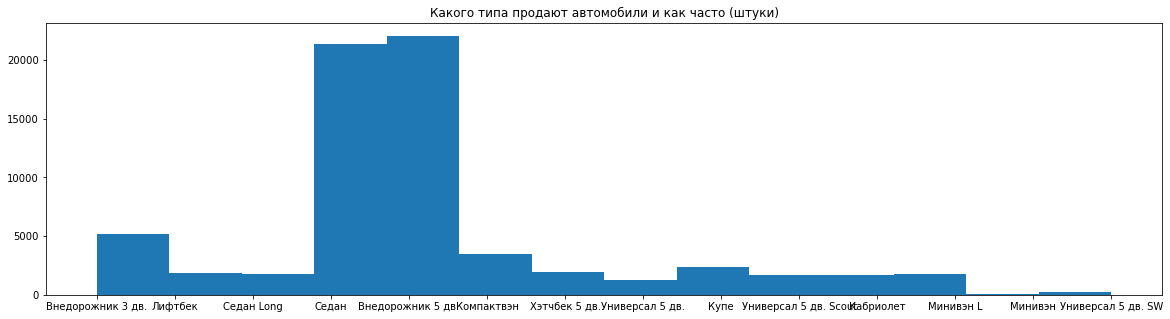

In [11]:
min_count = 50
counts = df['Type'].value_counts()
filtered_counts = counts[counts >= min_count]

# создаем графический объект
fig, ax = plt.subplots(figsize=(20,5))

# строим гистограмму только для отфильтрованных категорий
ax.hist(df.loc[df['Type'].isin(filtered_counts.index), 'Type'], bins=len(filtered_counts))

# добавляем заголовок
ax.set_title('Какого типа продают автомобили и как часто (штуки)')

# отображаем график
plt.show()

Чаще всего продают седаны и внедорожники 5 дв.

<AxesSubplot:title={'center':'Автомобили какой мощности продают и как часто (штуки)'}>

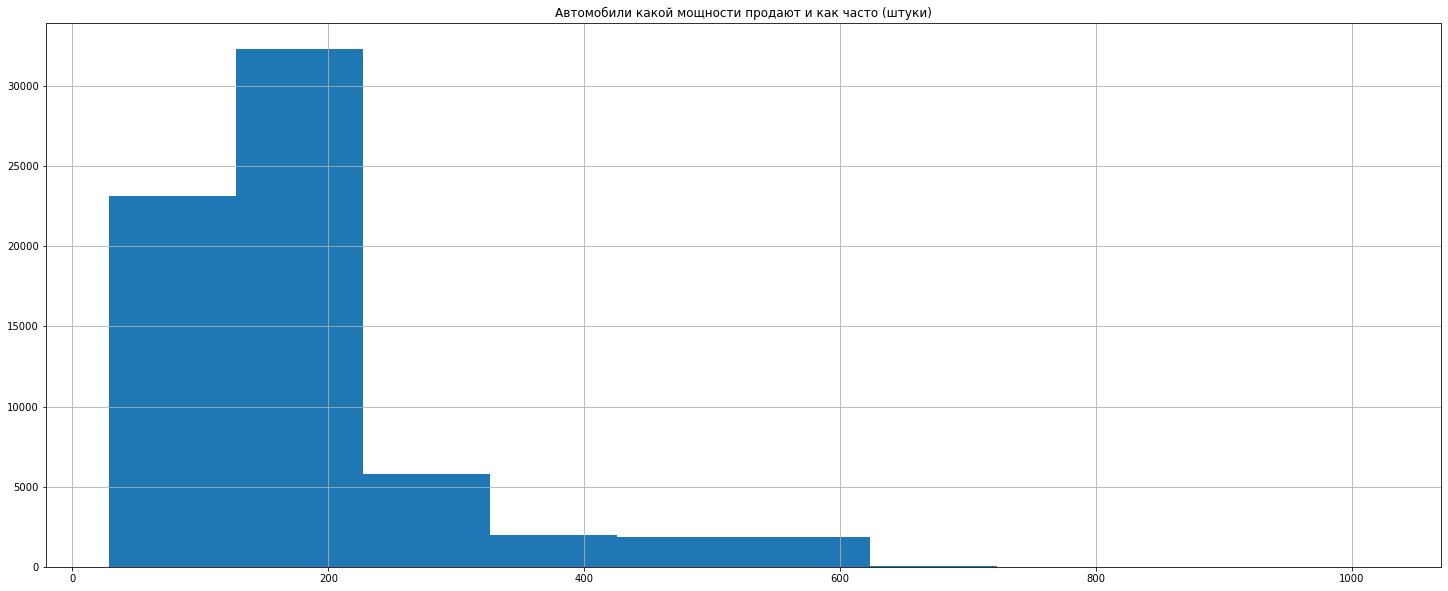

In [12]:
plt.title('Автомобили какой мощности продают и как часто (штуки)')
df.Power.hist(figsize=(25, 10))

Чаще всего продают автомобили с мощностью от 150 до 230 кВт.

<AxesSubplot:title={'center':'Как распределены цены на автомобили'}>

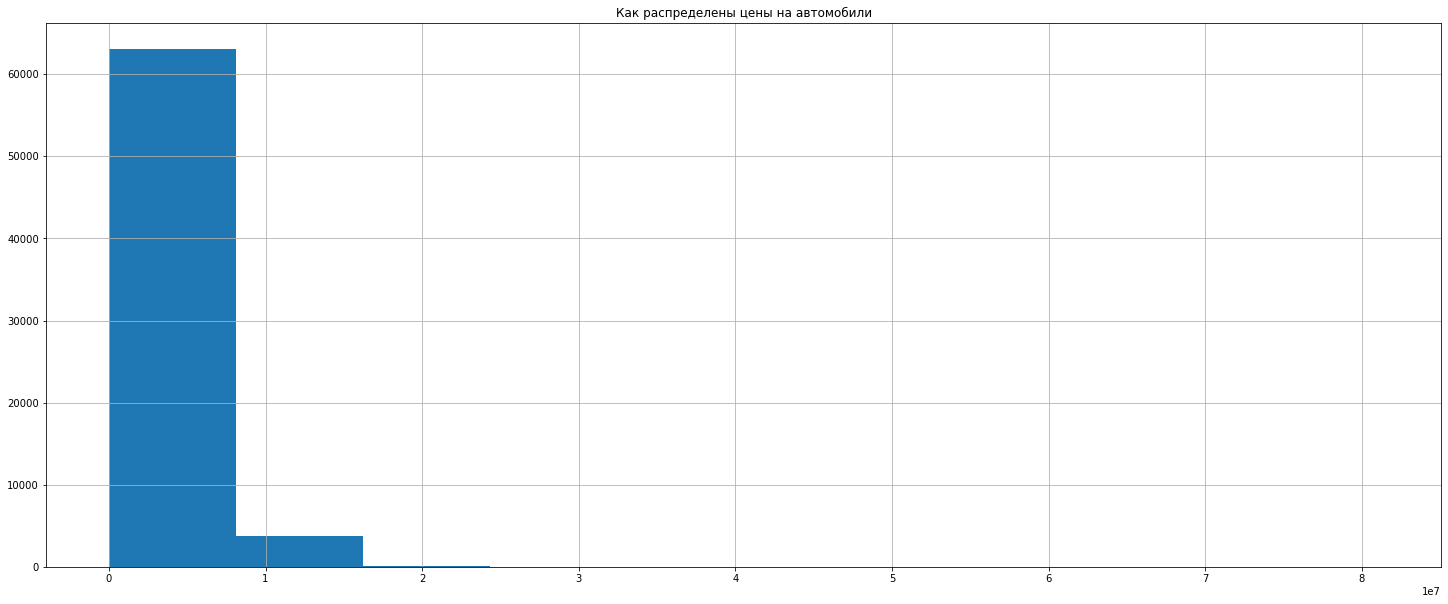

In [13]:
plt.title('Как распределены цены на автомобили')
df.Price.hist(figsize=(25, 10))

Большая часть автомобилей продается по стоимости менее 1 миллиона рублей. Это связано с тем, что самой популярной маркой автомобиля на сайте является LADA, относящаяся к бюджетному ценовому сегменту.

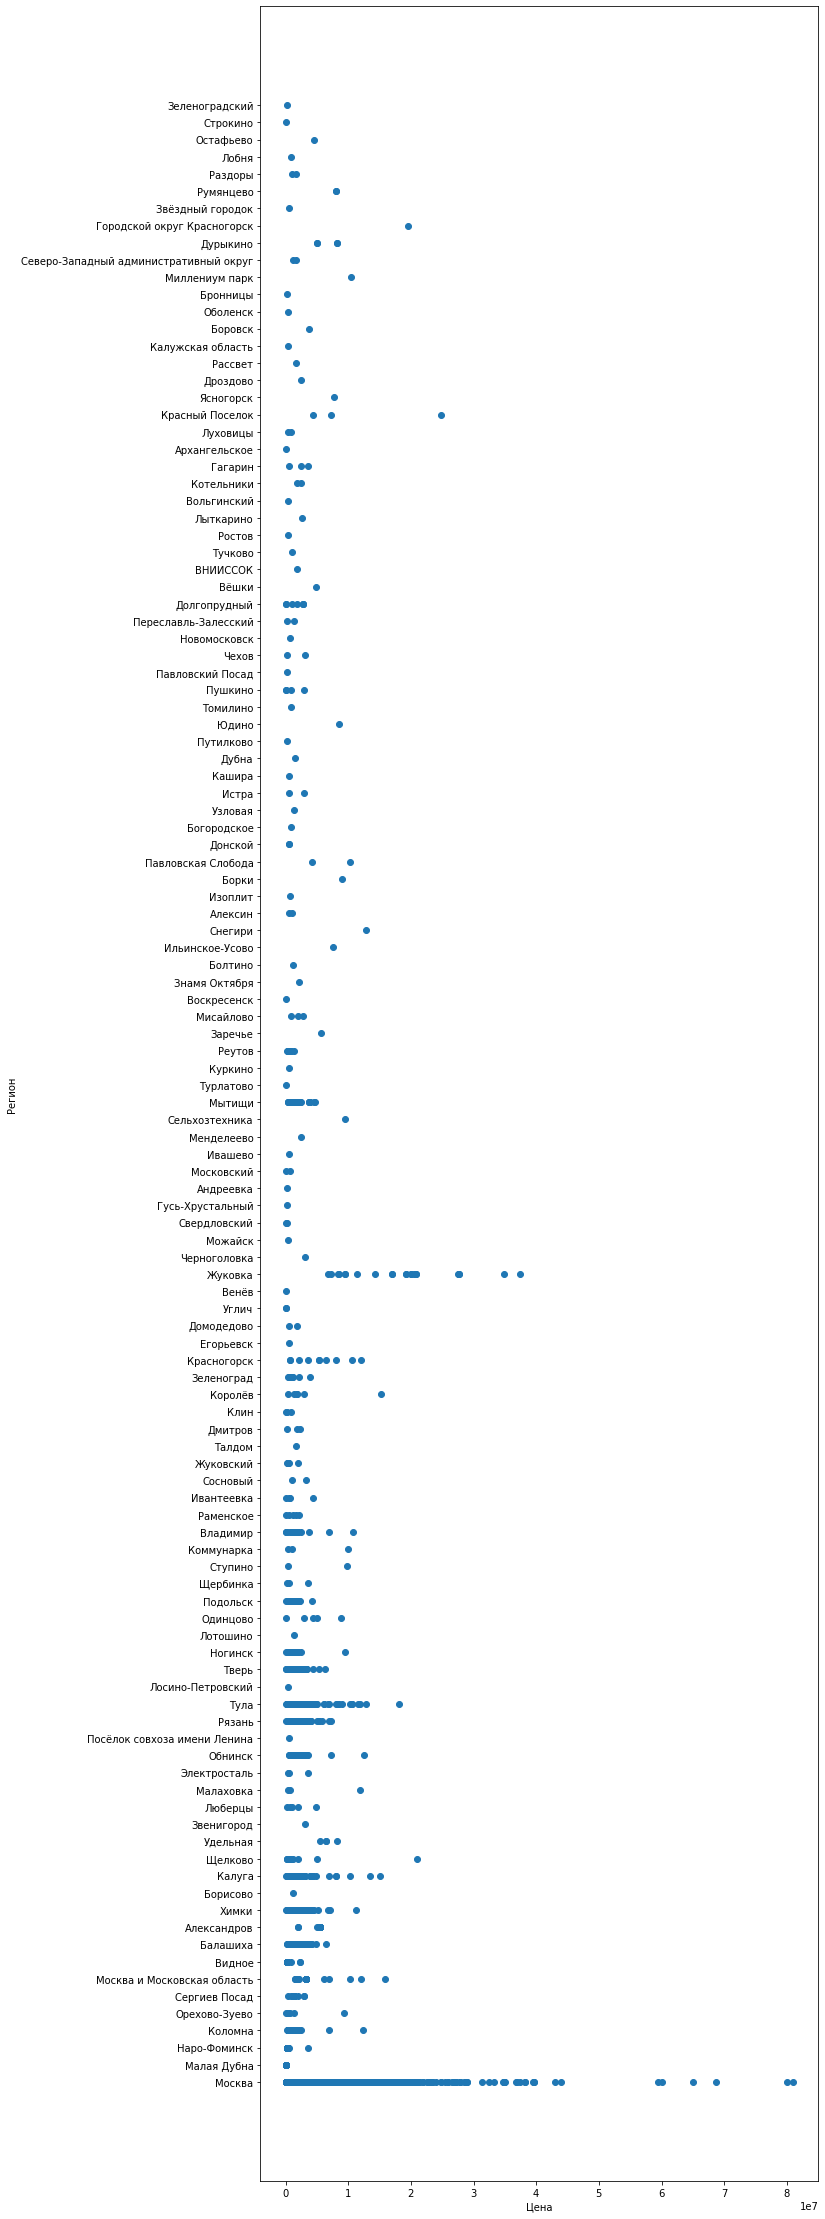

In [14]:
fig, ax = plt.subplots(figsize=(10,40))
ax.scatter(x = df.Price, y = df.Region)
plt.xlabel("Цена")
plt.ylabel("Регион")
plt.show()

Самые дорогие автомобили продаются в Москве, Жуковке и Красном поселке. Данное наблюдение можно объяснить тем, что указанные населенные пункты являются экономически развитыми регионами, где проживает некоторая часть богатого населения, готового покупать дорогие автомобили. Кроме того, в Москве автомобили стоят дороже, чем в пригородных районах, из-за более высоких цен на недвижимость и более ограниченной доступности подходящих мест для хранения автомобилей.

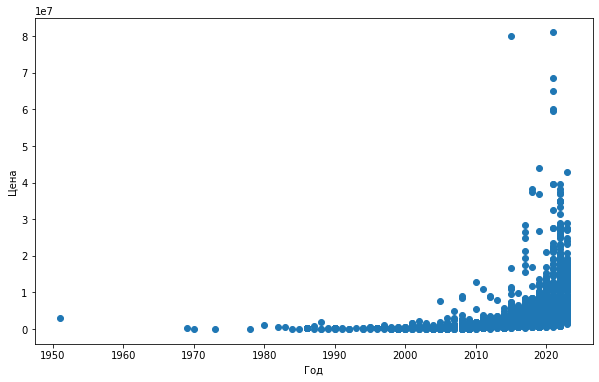

In [15]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(y = df.Price, x = df.Year)
plt.ylabel("Цена")
plt.xlabel("Год")
plt.show()

Самые дорогие автомобили на рынке - 2020-2023 года выпуска. Автомобили новых моделей имеют более глубокое использование современной технологии и средств индустрии, которые обеспечивают более высокие уровни безопасности, комфорта и производительности, чем их предшественники, поэтому их стоимость на рынке может быть выше.




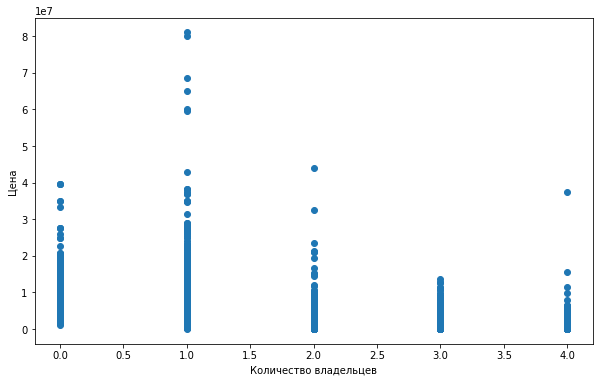

In [16]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(y = df.Price, x = df.Number_of_owners)
plt.ylabel("Цена")
plt.xlabel("Количество владельцев")
plt.show()

Дороже всего стоят машины с 1 владельцем. Это связано с тем, что машины с одним владельцем, как правило, более высокого качества и/или лучше ухаживались за ними, чем машины, которые уже имели несколько владельцев. Также может быть, что автомобили с одним владельцем могут быть редкими моделями или имеют другие уникальные характеристики, которые делают их более ценными на рынке.

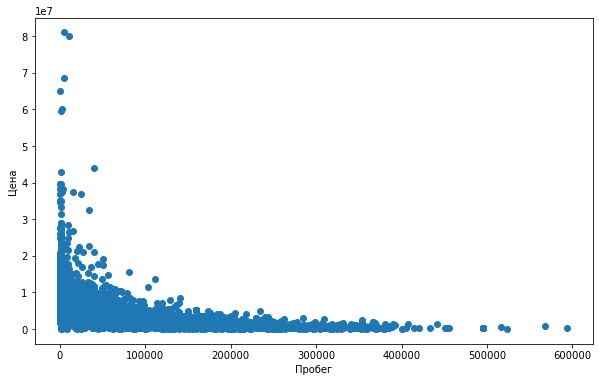

In [17]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(y = df.Price, x = df.Mileage)
plt.ylabel("Цена")
plt.xlabel("Пробег")
plt.show()

По графику видно, что величина пробега отрицательно влияет на стоимость автомобиля, т.е. чем больше пробег, тем меньше стоимость. В действительности, такой вывод имеет научное объяснение, так как с увеличением пробега растет риск поломок и износа, а также уменьшается жизненный цикл автомобиля, что влияет на его рыночную стоимость. Однако, также следует учитывать, что более высокий пробег может быть связан с тем, что автомобиль был использован более активно, как служебный, для путешествий или поездок на большие расстояния, что также влияет на стоимость.

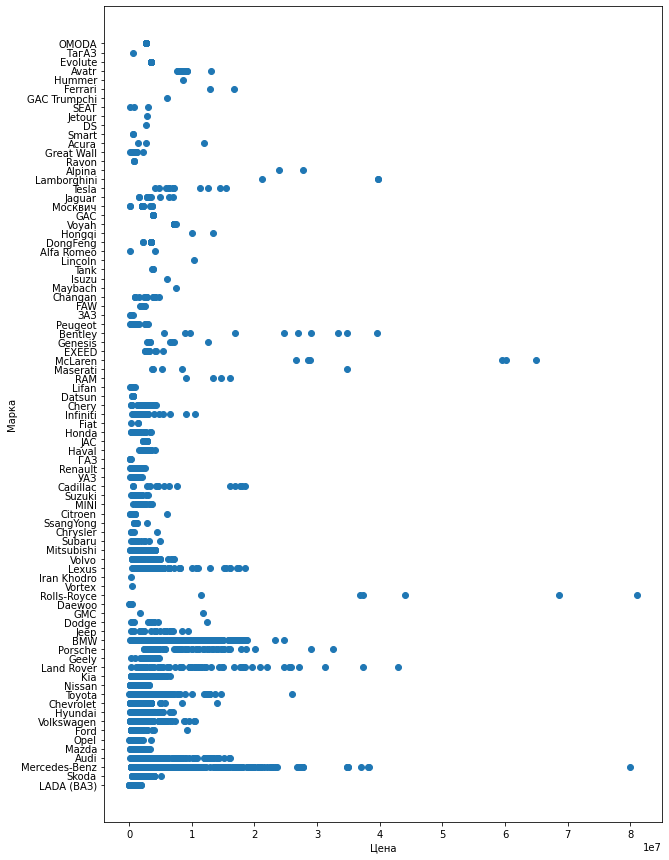

In [18]:
fig, ax = plt.subplots(figsize=(10,15))
ax.scatter(x = df.Price, y = df.Brand)
plt.xlabel("Цена")
plt.ylabel("Марка")
plt.show()

Самыми дорогими марками на рынке являются McLaren, Rolls-Royce и Mercedes-Benz.

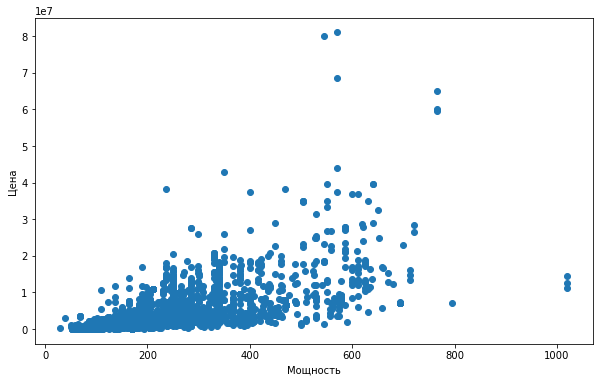

In [19]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(y = df.Price, x = df.Power)
plt.ylabel("Цена")
plt.xlabel("Мощность")
plt.show()

Можно заметить положительную связь мощности и цены: чем больше мощность, тем выше цена. Мощность автомобиля является одним из основных критериев, по которым потенциальные покупатели оценивают автомобиль, так как она напрямую связана с производительностью и динамикой автомобиля. Чем выше мощность, тем выше производительность и динамика автомобиля, что, в свою очередь, увеличивает его престиж и цену.

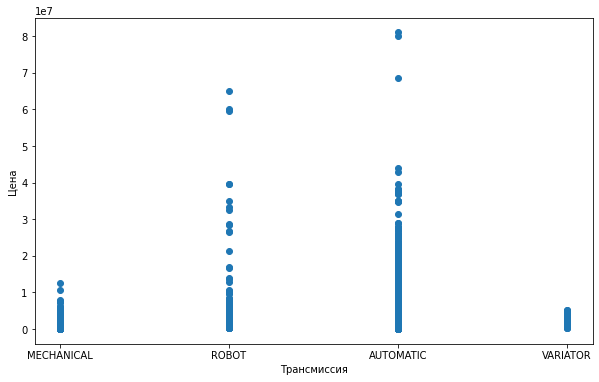

In [20]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(y = df.Price, x = df.Transmission)
plt.ylabel("Цена")
plt.xlabel("Трансмиссия")
plt.show()

Самыми дорогими являются автомобили с автоматической трансмиссией. Более высокая стоимость автоматической трансмиссии связана с тем, что она является более сложной технической деталью и требует более дорогостоящих материалов и производственных технологий. Кроме того, многие автомобили с автоматической трансмиссией обладают высокой производительностью, что приводит к более высокой стоимости.

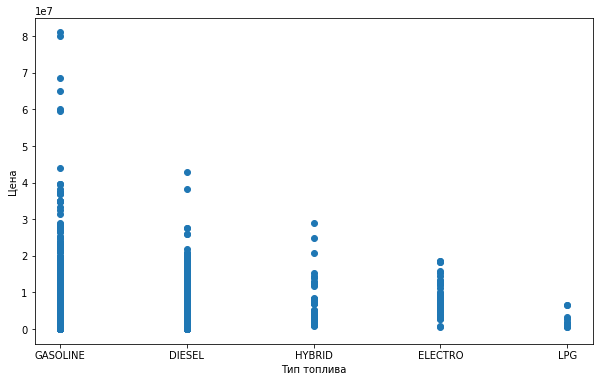

In [21]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(y = df.Price, x = df.Engine_type)
plt.ylabel("Цена")
plt.xlabel("Тип топлива")
plt.show()

Автомобили на бензиновом топливе являются самыми дорогими на рынке.